<a href="https://colab.research.google.com/github/ehcdc1967/Grupo5/blob/main/sobrecostos_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/TESIS/MEF_PORTAL_DE_DATOS_ABIERTOS/Data_parquet/poblacion.parquet')
df.drop(columns=['CODIGO_UNICO'], inplace=True, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50711 entries, 0 to 50710
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   FUNCION                  50711 non-null  object  
 1   SOBRECOSTO               50711 non-null  float64 
 2   TIEMPO_VIABILIDAD        50711 non-null  float64 
 3   TIEMPO_EJECUCION         50711 non-null  float64 
 4   BENEFICIARIO             50711 non-null  float64 
 5   CTRL_CONCURR             50711 non-null  float64 
 6   MONTO_LAUDO              50711 non-null  float64 
 7   MONTO_FIANZA             50711 non-null  float64 
 8   NATURALEZA_MEJORAMIENTO  50711 non-null  float64 
 9   NATURALEZA_AMPLIACION    50711 non-null  float64 
 10  NATURALEZA_RECUPERACION  50711 non-null  float64 
 11  NATURALEZA_CREACION      50711 non-null  float64 
 12  NATURALEZA_TOTAL         50711 non-null  float64 
 13  MODALIDAD_DIRECTA        50711 non-null  float64 
 14  MODALI

In [ ]:
# Elimino las columnas irrelevantes y maneje los valores faltantes
df.dropna(inplace=True)

In [ ]:
# One-Hot Encoding para variables categóricas
df = pd.get_dummies(df, columns=['FUNCION', 'DPTO', 'TIPO_MUNICIPALIDAD'], drop_first=True)
df = df.drop(columns=['CODIGO_UNICO'], errors='ignore')

In [ ]:
# Definir características (X) y objetivo (y)
X = df.drop(columns=['SOBRECOSTO'], errors='ignore')
y = df['SOBRECOSTO']

In [ ]:
# Dividir datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size=0.2 , random_state=2024 )

In [ ]:
# Estandarizar variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Inicio el modelo de Random Forest y ajustarlo a los datos de entrenamiento
classifier = RandomForestClassifier(random_state=2024)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=2024)

In [ ]:
# Predict on test data
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)


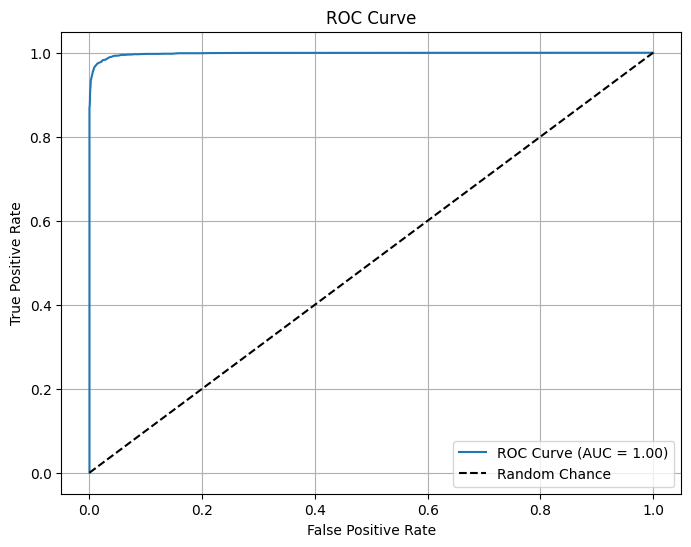

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [ ]:
!pip install ace-tools

In [ ]:
# Mostrar los resultados de importancia de características en una tabla
import pandas as pd

# Asegúrate de que `feature_importances` es un DataFrame
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Imprimir los resultados en la consola
print("Feature Importance from Random Forest:")
print(feature_importances)

# Opcional: Guardar el resultado en un archivo CSV para análisis adicional
feature_importances.to_csv("feature_importances.csv", index=False)


Feature Importance from Random Forest:
                                 Feature    Importance
16                       RATIO_ET_VIABLE  4.938131e-01
17                        RATIO_ET_COSTO  2.363335e-01
14                    EXPEDIENTE_TECNICO  1.285414e-01
2                           BENEFICIARIO  1.738029e-02
1                       TIEMPO_EJECUCION  1.492505e-02
..                                   ...           ...
29                         FUNCION_PESCA  1.028199e-05
25                     FUNCION_INDUSTRIA  4.423379e-06
28                         FUNCION_OTROS  9.359778e-08
22  FUNCION_DEFENSA Y SEGURIDAD NACIONAL  0.000000e+00
5                           MONTO_FIANZA  0.000000e+00

[69 rows x 2 columns]


In [ ]:
accuracy, conf_matrix, roc_auc, class_report

(0.9828453120378586,
 array([[7609,   32],
        [ 142, 2360]]),
 0.9981678575474916,
 '              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99      7641\n         1.0       0.99      0.94      0.96      2502\n\n    accuracy                           0.98     10143\n   macro avg       0.98      0.97      0.98     10143\nweighted avg       0.98      0.98      0.98     10143\n')

 **Interpretación de los Resultados**

In [ ]:
(0.9828453120378586,
 array([[7609,   32],
        [ 142, 2360]]),
 0.9981678575474916,
 '              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99      7641\n         1.0       0.99      0.94      0.96      2502\n\n    accuracy                           0.98     10143\n   macro avg       0.98      0.97      0.98     10143\nweighted avg       0.98      0.98      0.98     10143\n')

NameError: name 'array' is not defined


**Precisión General (Accuracy)**:


1.   Valor: 0.9828 (98.28%)
2.   Interpretación: El modelo clasifica correctamente el 98.28% de los casos en el conjunto de prueba. Esto indica un rendimiento general muy alto.





**Matriz de Confusión:**

1.   Formato: [[TN, FP], [FN, TP]]
2.   Resultados:
    *   Verdaderos Negativos (TN): 7609 casos correctamente predichos como sin sobrecostos.
    *   Falsos Positivos (FP): 32 casos predichos como con sobrecostos pero que no tienen sobrecostos.
    *   Falsos Negativos (FN): 142 casos con sobrecostos que el modelo no identificó correctamente.
    *   Verdaderos Positivos (TP): 2360 casos correctamente identificados con sobrecostos.





**Interpretación: El modelo muestra un muy bajo número de errores (FP y FN), con una excelente capacidad para** identificar casos positivos y negativos.

**AUC-ROC (Área bajo la curva ROC):**



*   Valor: 0.9982 (99.82%)
*   Interpretación: Este valor, cercano a 1, indica que el modelo tiene una capacidad casi perfecta para distinguir entre casos con y sin sobrecostos.

**Reporte de Clasificación:**

**Para Clase 0 (sin sobrecostos):**
- Precisión: 98% - De todas las predicciones como "sin sobrecostos", el 98% fueron correctas.
- Recall: 100% - El modelo identificó todos los casos "sin sobrecostos" de manera correcta.
- F1-Score: 99% - Combina precisión y recall, confirmando un desempeño excelente para esta clase.

**Para Clase 1 (con sobrecostos):**
- Precisión: 99% - De todas las predicciones como "con sobrecostos", el 99% fueron correctas.
- Recall: 94% - El modelo identificó el 94% de los casos con sobrecostos.
- F1-Score: 96% - También alto, lo que refleja un equilibrio entre precisión y recall.

**Promedios:**
* Macro Avg: 98% - Media aritmética entre las métricas de ambas clases, útil en casos de clases balanceadas.
* Weighted Avg: 98% - Promedio ponderado por la cantidad de instancias en cada clase, considerando que la clase "sin sobrecostos" es más común.

**Resumen:**
* El modelo tiene un desempeño excelente, con una alta precisión y una capacidad casi perfecta para distinguir entre casos de sobrecostos y no sobrecostos.

* Hay margen de mejora en la detección de casos con sobrecostos (recall de 94%), que podría abordarse ajustando los umbrales de decisión o balanceando mejor las clases.

* Las métricas indican que el modelo es robusto y adecuado para aplicaciones prácticas, como la detección temprana de proyectos en riesgo de sobrecostos.